In [1]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

2022-03-15 17:06:32.281192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 17:06:32.281217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# install: %pip install python-mnist

In [52]:
# evaluate the deep model on the test dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

x_train, y_train, x_valid, y_valid = load_dataset()
x_train, x_valid = prep_pixels(x_train, x_valid)

In [53]:
model = Sequential()
model.add(Conv2D(32,kernel_size=4,activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=4))
model.add(Conv2D(64,kernel_size=4,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [54]:
import sys
  
sys.path.insert(0, '../')

from ipynb.fs.full.utils import save_weights, evaluate_layers_sensitivity, prune_layer_feature_maps

In [55]:
save_weights("intel_avx_model.txt", model)

# Training

In [56]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2138 - accuracy: 0.9349 - val_loss: 0.0783 - val_accuracy: 0.9773
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0571 - val_accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0456 - val_accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0381 - val_accuracy: 0.9886


In [57]:
model.summary()

Model: "sequential_1129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1539 (Conv2D)        (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1539 (MaxPool  (None, 6, 6, 32)         0         
 ing2D)                                                          
                                                                 
 conv2d_1540 (Conv2D)        (None, 3, 3, 64)          32832     
                                                                 
 max_pooling2d_1540 (MaxPool  (None, 1, 1, 64)         0         
 ing2D)                                                          
                                                                 
 flatten_1129 (Flatten)      (None, 64)                0         
                                                                 
 dense_2258 (Dense)          (None, 128)           

In [58]:
model.predict(x_valid[0:1])

array([[3.1335077e-11, 1.5146357e-07, 6.0464384e-07, 1.5468757e-08,
        5.3304241e-09, 4.6703644e-11, 9.4435174e-16, 9.9999821e-01,
        1.0657228e-09, 1.0434584e-06]], dtype=float32)

In [59]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Prunning

layer: 0
remove: 1
313/313 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9886
remove: 4
313/313 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9883
remove: 7
313/313 [==============================] - 2s 5ms/step - loss: 0.0432 - accuracy: 0.9869
remove: 10
313/313 [==============================] - 2s 5ms/step - loss: 0.0540 - accuracy: 0.9838
remove: 13
313/313 [==============================] - 1s 4ms/step - loss: 0.0868 - accuracy: 0.9729
remove: 16
313/313 [==============================] - 1s 4ms/step - loss: 0.2073 - accuracy: 0.9354
remove: 19
313/313 [==============================] - 1s 4ms/step - loss: 0.5617 - accuracy: 0.8562
remove: 22
313/313 [==============================] - 2s 4ms/step - loss: 0.5447 - accuracy: 0.8460
remove: 25
313/313 [==============================] - 2s 4ms/step - loss: 1.6447 - accuracy: 0.6025
remove: 28
313/313 [==============================] - 2s 4ms/step - loss: 2.0638 - accuracy: 0

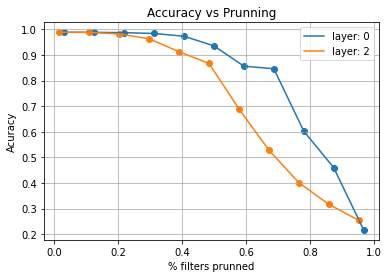

In [60]:
evaluate_layers_sensitivity(model, x_valid, y_valid)

In [61]:
# Prune first layer
model_prunned = prune_layer_feature_maps(model, 0, 16)
model_prunned.compile(loss = "categorical_crossentropy", metrics = ["accuracy"])
_, _ = model_prunned.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.2073 - accuracy: 0.9354


In [62]:
# retrain
_ = model_prunned.fit(x_train, y_train, epochs=3, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0562 - val_accuracy: 0.9829
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0483 - val_accuracy: 0.9862
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0458 - val_accuracy: 0.9882


In [63]:
# Prune second layer
model_prunned_2 = prune_layer_feature_maps(model_prunned, 2, 25)
model_prunned_2.compile(loss = "categorical_crossentropy", metrics = ["accuracy"])
_, _ = model_prunned_2.evaluate(x_valid,  y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.1975 - accuracy: 0.9400


In [64]:
# retrain
_ = model_prunned_2.fit(x_train, y_train, epochs=3, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0579 - val_accuracy: 0.9841
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0616 - val_accuracy: 0.9835
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0561 - val_accuracy: 0.9868


In [65]:
model_prunned_2.summary()

Model: "sequential_1687"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2264 (Conv2D)        (None, 25, 25, 16)        272       
                                                                 
 max_pooling2d_2264 (MaxPool  (None, 6, 6, 16)         0         
 ing2D)                                                          
                                                                 
 conv2d_2290 (Conv2D)        (None, 3, 3, 39)          10023     
                                                                 
 max_pooling2d_2290 (MaxPool  (None, 1, 1, 39)         0         
 ing2D)                                                          
                                                                 
 flatten_1687 (Flatten)      (None, 39)                0         
                                                                 
 dense_3374 (Dense)          (None, 128)           

In [66]:
model_prunned_2.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0561 - accuracy: 0.9868


[0.0561346560716629, 0.9868000149726868]

In [67]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0381 - accuracy: 0.9886


[0.038122765719890594, 0.9886000156402588]

In [68]:
save_weights("prunned_intel_avx_model.orga", model_prunned_2)